# Milestone 5 : N body problem.

### 1. Write a function to integrate the N body problem.

In [1]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, reshape, linspace

def Euler(U,t1,t2,F):      

    dt = t2 - t1
    return U + dt*F(U)

def RangeKutta4(U,t1,t2,F):

    dt = t2 - t1
    k1 = F(U)
    k2 = F(U + (dt/2)*k1)
    k3 = F(U + (dt/2)*k2)
    k4 = F(U + (dt)*k3)
    return U + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)




    


def NBody_Problem(Nb,Nc,Nv,r,v,t,Temporal_scheme):

    Nb = 3  # Number of bodies
    Nc = 3  # Number of coordinates (x,y,z)
    Nv = 2  # Number of variables per coordinate (position, velocity)

    U = zeros((Nb * Nc * Nv))  
    Us = reshape(U, (Nb, Nc, Nv))
    r = reshape(Us[:,:,0],(Nb,Nc))  # Positions
    v = reshape(Us[:,:,1], (Nb,Nc))  # Velocities

    F = zeros((Nb * Nc * Nv))
    Fs = reshape(F, (Nb, Nc, Nv)) 
    drdt = reshape(Fs[:,:,0],(Nb,Nc)) #Velocities
    dvdt = reshape(Fs[:,:,1],(Nb,Nc)) #Accelerations

    def F1(A):
        U = A
        dvdt = zeros((Nb,Nc))
        drdt = v.copy()

        for i in range(Nb):
            for j in range(Nc):
                dvdt = dvdt + (r[j,:] - r[i,:])/(linalg.norm((r[j,:] - r[i,:]))**3)
        return drdt,dvdt
    
    return Cauchy_Problem(F1,U,t,Temporal_scheme)


Nb = 3
Nc = 2
Nv = 2

r0 = array([[1,0],[0,1],[-1,0]])
v0 = array([[0,1],[-1,0],[0,-1]])

t0 = 0
tf = 10
np = 1000

t = linspace(t0, tf, np)

Prueba = NBody_Problem(Nb,Nc,Nv,r0,v0,t,Euler)  





C:\Users\Mateo\AppData\Local\Temp\ipykernel_49824\1624092877.py:56: RuntimeWarning: invalid value encountered in divide
  dvdt = dvdt + (r[j,:] - r[i,:])/(linalg.norm((r[j,:] - r[i,:]))**3)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [2]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, reshape, linspace


def F(A):
    U = A
    dvdt = zeros((Nb,Nc))
    drdt = v.copy()

    for i in range(Nb):
        for j in range(Nc):
            dvdt = dvdt + (r[j,:] - r[i,:])/(linalg.norm((r[j,:] - r[i,:]))**3)
    return drdt,dvdt

Nb = 3  # Number of bodies
Nc = 3  # Number of coordinates (x,y,z)
Nv = 2  # Number of variables per coordinate (position, velocity)

U = zeros((Nb * Nc * Nv))  
Us = reshape(U, (Nb, Nc, Nv))
r = reshape(Us[:,:,0],(Nb,Nc))  # Positions
v = reshape(Us[:,:,1], (Nb,Nc))  # Velocities

F = zeros((Nb * Nc * Nv))
Fs = reshape(F, (Nb, Nc, Nv)) 
drdt = reshape(Fs[:,:,0],(Nb,Nc)) #Velocities
dvdt = reshape(Fs[:,:,1],(Nb,Nc)) #Accelerations

r[0,:] = (1,0,0)
v[0,:] = (0,1,0)
r[1,:] = (0,1,0)
v[1,:] = (-1,0,0)
r[2,:] = (-1,0,0)
v[2,:] = (0,-1,0)

print(U)
print(F)







def NBodyProblem(U,Nb,Nc,Nv):
    U = zeros((Nb * Nc * Nv))  
    Us = reshape(U, (Nb, Nc, Nv))
    r = reshape(Us[:,:,0],(Nb,Nc))  # Positions
    v = reshape(Us[:,:,1], (Nb,Nc))  # Velocities

    F = zeros((Nb * Nc * Nv))
    Fs = reshape(F, (Nb, Nc, Nv)) 
    drdt = reshape(Fs[:,:,0],(Nb,Nc)) #Velocities
    dvdt = reshape(Fs[:,:,1],(Nb,Nc)) #Accelerations

    for i in range(Nb):
        drdt[i,:] = v[i,:]
        for j in range(Nc):
            if i!=j: 
                dvdt[i,:] = dvdt[i,:] + ((r[j,:]-r[i,:])/linalg.norm(r[j,:]-r[i,:]))

    return F


[ 1.  0.  0.  1.  0.  0.  0. -1.  1.  0.  0.  0. -1.  0.  0. -1.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


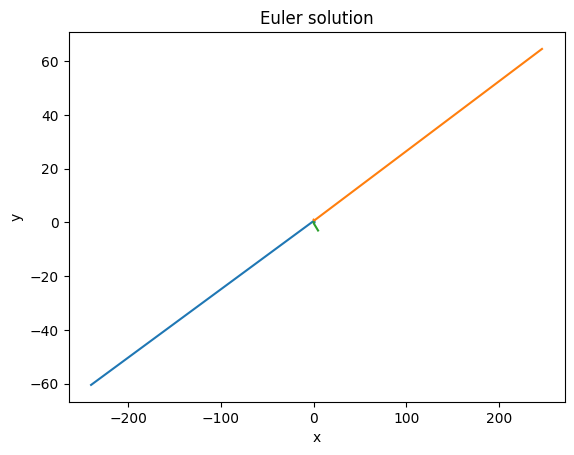

In [82]:

import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, reshape, linspace
import import_ipynb
import Numerical_schemes

def Cauchy_Problem(F,U0,t,Temporal_scheme):  #F: Funcion Rn,  #U0: vector Rn, #T: Tiempo
                                            
    N = len(t) - 1     #Número de intervalos temporales
    Nv = len(U0)         #Número de variables
    U = zeros((N+1,Nv))
    U[0,:] = U0

    for n in range(N):
        U[n+1,:] = Temporal_scheme(U[n,:],t[n],t[n+1],F)    #Respetamos la API
    return U




def NBodyProblem(Nb,Nc,Nv,r0,v0,t,Temporal_scheme): 

    Nt = len(t) 

    U0 = zeros((Nb * Nc * Nv))  
    Us = reshape(U0, (Nb, Nc, Nv))
    r = reshape(Us[:,:,0],(Nb,Nc))  # Positions
    v = reshape(Us[:,:,1], (Nb,Nc))  # Velocities


    for i in range(Nb):    #We build the vector U with the initial conditions
        r[i,:] = r0[i,:]
        v[i,:] = v0[i,:]
    
    

    def Function(X): 
            Xs = reshape(X, (Nb, Nc, Nv))
            xr = reshape(Xs[:,:,0],(Nb,Nc))  # Positions
            xv = reshape(Xs[:,:,1], (Nb,Nc))  # Velocities

            F = zeros((Nb * Nc * Nv))
            Fs = reshape(F, (Nb, Nc, Nv)) 
            drdt = reshape(Fs[:,:,0],(Nb,Nc)) #Velocities
            dvdt = reshape(Fs[:,:,1],(Nb,Nc)) #Accelerations

            for i in range(Nb):
                drdt[i,:] = xv[i,:]
                for j in range(Nb):
                    if i!=j: 
                        distancia_vect =  (xr[j,:]-xr[i,:])
                        dist = linalg.norm(xr[j,:]-xr[i,:])
                        if dist > 1e-3:
                            dvdt[i,:] = dvdt[i,:] + (distancia_vect/(dist**3))
            return F
    
    U = Cauchy_Problem(Function,U0,t,Temporal_scheme)

    U_sol = reshape(U,(Nt,Nb,Nc,Nv))
    rsol = reshape(U_sol[:,:,:,0],(Nt,Nb,Nc))  # Positions
    vsol = reshape(U_sol[:,:,:,1],(Nt,Nb,Nc))  # Positions

    return rsol,vsol


Nb = 3  # Number of bodies
Nc = 2  # Number of coordinates (x,y,z)
Nv = 2  # Number of variables per coordinate (position, velocity)  

r0 = zeros((Nb,Nc))
v0 = zeros((Nb,Nc))

r0[0,:] = (1,0) #Cuerpo 1
v0[0,:] = (0,1)
r0[1,:] = (0,1) #Cuerpo 2
v0[1,:] = (1,0)
r0[2,:] = (0,0) #Cuerpo 3
v0[2,:] = (0,-1)

t0 = 0
tf = 10
Np = 10000

t = linspace(t0, tf, Np)


rs,vs = NBodyProblem(Nb,Nc,Nv,r0,v0,t,Numerical_schemes.RangeKutta4) 


plt.plot(rs[:,0,0], rs[:,0,1])
plt.plot(rs[:,1,0], rs[:,1,1])
plt.plot(rs[:,2,0], rs[:,2,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler solution')
plt.show()











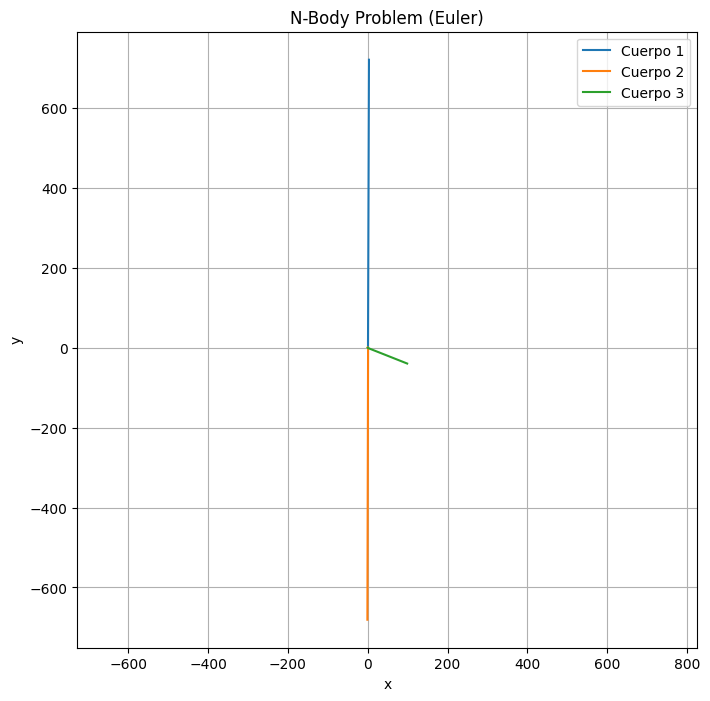

In [ ]:
import matplotlib.pyplot as plt
from numpy import array, zeros, concatenate, linalg, any, reshape, linspace
import import_ipynb
import Numerical_schemes

def Cauchy_Problem(F, U0, t, Temporal_scheme):  
    # F: Funcion Rn -> Rn
    # U0: vector Rn
    # t: Vector de tiempo
                                            
    N = len(t) - 1     # Número de intervalos temporales
    Nv = len(U0)       # Número de variables totales (Nb * Nc * Nv_local)
    U = zeros((N+1, Nv))
    U[0,:] = U0

    for n in range(N):
        U[n+1,:] = Temporal_scheme(U[n,:], t[n], t[n+1], F)    # Respetamos la API del esquema
    return U

def NBodyProblem(Nb, Nc, Nv, r0, v0, t, Temporal_scheme): 

    Nt = len(t) 

    # Inicialización del vector de estado aplanado
    U0 = zeros((Nb * Nc * Nv))  
    Us = reshape(U0, (Nb, Nc, Nv))
    
    # Vistas para llenar las condiciones iniciales
    r = Us[:,:,0]  # Positions (View)
    v = Us[:,:,1]  # Velocities (View)

    for i in range(Nb):    # Build the vector U with the initial conditions
        r[i,:] = r0[i,:]
        v[i,:] = v0[i,:]
    
    # Definición de la función de derivadas dentro del scope para acceder a Nb, Nc, etc.
    def Function(X): 
            epsilon = 0.1 # Softening: Evita divisiones por cero cuando se acercan mucho

            Xs = reshape(X, (Nb, Nc, Nv))
            xr = reshape(Xs[:,:,0], (Nb, Nc))  # Positions
            xv = reshape(Xs[:,:,1], (Nb, Nc))  # Velocities

            F = zeros((Nb * Nc * Nv))
            Fs = reshape(F, (Nb, Nc, Nv)) 
            drdt = Fs[:,:,0] # Velocities (View)
            dvdt = Fs[:,:,1] # Accelerations (View)

            for i in range(Nb):
                # La derivada de la posición es la velocidad
                drdt[i,:] = xv[i,:]
                
                # La derivada de la velocidad es la aceleración (Fuerzas)
                for j in range(Nb): 
                    if i != j: 
                        dist_vec = xr[j,:] - xr[i,:]
                        dist_norm = linalg.norm(dist_vec)
                        
                        # Usamos Softening: (r^2 + epsilon^2)^(3/2)
                        # Esto evita que la fuerza sea infinita si chocan
                        dvdt[i,:] = dvdt[i,:] + (dist_vec / ((dist_norm**2 + epsilon**2)**1.5))
            return F
    
    # Resolver el problema de Cauchy
    U = Cauchy_Problem(Function, U0, t, Temporal_scheme)

    # Reconstruir solución para el return
    U_sol = reshape(U, (Nt, Nb, Nc, Nv))
    rsol = reshape(U_sol[:,:,:,0], (Nt, Nb, Nc))  # Positions over time
    vsol = reshape(U_sol[:,:,:,1], (Nt, Nb, Nc))  # Velocities over time

    return rsol, vsol

# --- Parámetros del problema ---
Nb = 3  # Number of bodies
Nc = 2  # Number of coordinates (x,y)
Nv = 2  # Number of variables per coordinate (position, velocity)  

r0 = zeros((Nb, Nc))
v0 = zeros((Nb, Nc))

# Condiciones iniciales
r0[0,:] = (1, 0)  # Cuerpo 1
v0[0,:] = (0, 1)

r0[1,:] = (0, 1)  # Cuerpo 2
v0[1,:] = (1, 0)

r0[2,:] = (0, 0)  # Cuerpo 3
v0[2,:] = (0, -1)

# Tiempo
t0 = 0
tf = 20 # Reducimos tiempo final para ver mejor el detalle de la orbita
Np = 20000 # Aumentamos puntos para mejorar la precisión de Euler
t = linspace(t0, tf, Np)

# Ejecución usando tu esquema importado
rs, vs = NBodyProblem(Nb, Nc, Nv, r0, v0, t, Numerical_schemes.Euler) 

# Gráficas
plt.figure(figsize=(8, 8))
plt.plot(rs[:,0,0], rs[:,0,1], label='Cuerpo 1')
plt.plot(rs[:,1,0], rs[:,1,1], label='Cuerpo 2')
plt.plot(rs[:,2,0], rs[:,2,1], label='Cuerpo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('N-Body Problem (Euler con Softening)')
plt.legend()
plt.grid(True)
plt.axis('equal') # Importante para ver órbitas reales
plt.show()